In [4]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/INTROTOTENSORFLOW/INTROTONEURALNETWORKS INTROTOTENSORFLOW 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs


import numpy as np

In [20]:
scalar = 6

In [22]:
scalar

6

In [23]:
vector = [scalar, scalar]
vector

[6, 6]

In [5]:
lol = [[list(range(2)), list(range(2)), list(range(2))], [list(range(2)), list(range(2)), list(range(2))]]

In [25]:
lol[0]

[[0, 1], [0, 1], [0, 1]]

In [24]:
lol

[[[0, 1], [0, 1], [0, 1]], [[0, 1], [0, 1], [0, 1]]]

In [6]:
tensor = np.array(lol)

In [9]:
tensor2 = np.array([tensor, tensor])

In [14]:
tensor.shape

(2, 3, 2)

In [15]:
tensor2.shape

(2, 2, 3, 2)

In [8]:
len(tensor.shape)

3

In [11]:
len(tensor2.shape)

4

In [18]:
np.prod(tensor.shape)

12

In [19]:
np.prod(tensor2.shape)

24

In [13]:
tensor

array([[[0, 1],
        [0, 1],
        [0, 1]],

       [[0, 1],
        [0, 1],
        [0, 1]]])

In [12]:
tensor2

array([[[[0, 1],
         [0, 1],
         [0, 1]],

        [[0, 1],
         [0, 1],
         [0, 1]]],


       [[[0, 1],
         [0, 1],
         [0, 1]],

        [[0, 1],
         [0, 1],
         [0, 1]]]])

In [1]:
#=================================================-
#### Slide 11: Load TensorFlow for Python  ####

# Import tensorflow.
import tensorflow as tf


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/INTROTOTENSORFLOW/INTROTONEURALNETWORKS INTROTOTENSORFLOW 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [2]:
#=================================================-
#### Slide 5: Loading packages  ####

import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt                     
import numpy as np
import math
import seaborn as sns
# Scikit-learn packages.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
# TensorFlow and supporting packages.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam




In [5]:
#=================================================-
#### Slide 6: Directory settings  ####

# Set 'main_dir' to location of the project folder
from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)




/Users/matskarz/Skillsoft-Content/IntrotoNeural_Networks
/Users/matskarz/Skillsoft-Content/IntrotoNeural_Networks/data


In [6]:
#=================================================-
#### Slide 7: Load the data  ####

credit_card = pd.read_csv(str(data_dir) + '/credit_card_data.csv')
print(credit_card.head())




   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
0         0         0   

In [26]:
#=================================================-
#### Slide 11: Data prep: convenience function (cont'd)  ####

def data_prep(df):
    
    # Fill missing values with mean 
    df = df.fillna(df.mean()['BILL_AMT1'])

    # Drop an unnecessary identifier column.
    df = df.drop('ID',axis = 1)

    # Convert 'sex' into dummy variables.
    df = pd.get_dummies(df)
    
    # Separate predictors from data.
    X = df.drop(['default_payment_next_month'], axis=1)

    # Separate target from data.
    y = df['default_payment_next_month']

    # Set the seed to 1.
    np.random.seed(1)
    
    # Split data into train, test, and validation set, use a 70 - 15 - 15 split.
    # First split data into train-test with 70% for train and 30% for test.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
    
    print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
    
    # Transforms features by scaling each feature to a given range.
    # The default is the range between 0 and 1.
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_scaled = min_max_scaler.fit_transform(X_train)
    X_test_scaled = min_max_scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [27]:
#=================================================-
#### Slide 12: Data prep  ####

X_train_scaled, X_test_scaled, y_train, y_test = data_prep(credit_card)




Train shape: (21000, 23) Test shape: (9000, 23)


In [28]:
#=================================================-
#### Slide 16: Implement Sequential model with Dense layers  ####

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Let's set the seed so that we can reproduce the results.
tf.random.set_seed(1)

## Set up model.
model = Sequential([
  Dense(32, input_shape=(X_train_scaled.shape[1], )),
  Dense(20, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [29]:
#=================================================-
#### Slide 17: Compile the model  ####

# Compile the model.
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)




In [30]:
#=================================================-
#### Slide 18: Fit the model  ####

model_res = model.fit(
    X_train_scaled,
    y_train,
    validation_split=.2,
    epochs=30,
)

Epoch 1/30
525/525 [==============================] - 1s 1ms/step - loss: 0.4917 - accuracy: 0.7896 - val_loss: 0.4574 - val_accuracy: 0.8162
Epoch 2/30
525/525 [==============================] - 1s 957us/step - loss: 0.4656 - accuracy: 0.8060 - val_loss: 0.4474 - val_accuracy: 0.8248
Epoch 3/30
525/525 [==============================] - 1s 1ms/step - loss: 0.4596 - accuracy: 0.8104 - val_loss: 0.4410 - val_accuracy: 0.8274
Epoch 4/30
525/525 [==============================] - 1s 962us/step - loss: 0.4560 - accuracy: 0.8111 - val_loss: 0.4373 - val_accuracy: 0.8274
Epoch 5/30
525/525 [==============================] - 1s 982us/step - loss: 0.4528 - accuracy: 0.8149 - val_loss: 0.4380 - val_accuracy: 0.8290
Epoch 6/30
525/525 [==============================] - 1s 1ms/step - loss: 0.4506 - accuracy: 0.8156 - val_loss: 0.4435 - val_accuracy: 0.8114
Epoch 7/30
525/525 [==============================] - 1s 976us/step - loss: 0.4490 - accuracy: 0.8145 - val_loss: 0.4322 - val_accuracy: 0.829

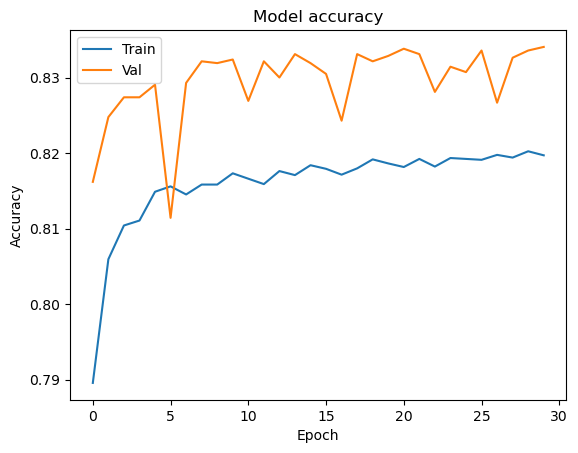

In [31]:
#=================================================-
#### Slide 21: Visualize training/validation accuracy for each epoch  ####

# Plot training & validation accuracy values
plt.plot(model_res.history['accuracy'])    #<- accuracy scores
plt.plot(model_res.history['val_accuracy'])#<- get val accuracy scores from dictionary
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

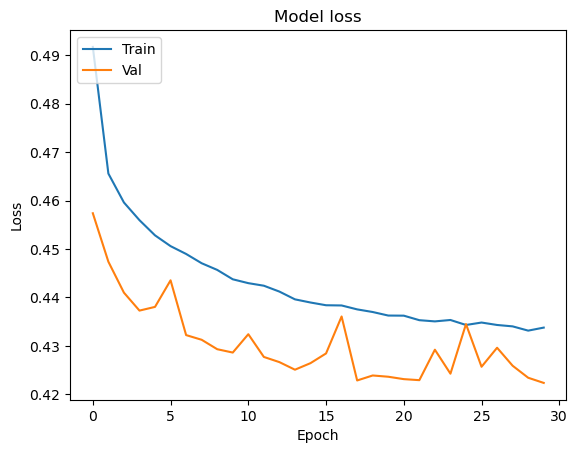

In [32]:
#=================================================-
#### Slide 22: Visualize training/validation loss for each epoch  ####

# Plot training & validation loss values
plt.plot(model_res.history['loss'])
plt.plot(model_res.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [33]:
#=================================================-
#### Slide 23: Evaluate loss, accuracy on test data and predict  ####

loss, accuracy = model.evaluate(x = X_test_scaled, y = y_test)
print("Loss: {0:6.3f}, Accuracy: {1:6.3f}".format(loss, accuracy))
y_pred_prob = model.predict(X_test_scaled)
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(y_pred)

282/282 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8179
Loss:  0.440, Accuracy:  0.818
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
#=================================================-
#### Slide 25: Exercise  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
